# Clasificación Random Forest (RF)

Mateo Rosero

## Explicaciones Clave
**Sobre el dataset:** ``car_data.csv`` contiene datos para determinar si un cliente comprará un automóvil (1) o no (0) en base a dos variables independientes:
- _Age_ --> Edad del cliente en años.
- _AnnualSalary_ --> Salario anual del cliente. <br>

**Entrenamiento del modelo:** Se utilizará la librería de ``skearn`` para poder implementar el algoritmo de Clasificación por Random Forest (RF).

# Importar Librerías Necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from matplotlib.colors import ListedColormap

# Importar el Dataset

In [2]:
dataset = pd.read_csv('car_data.csv')

# Definición de Variable Independiente y Dependiente

In [3]:
X = dataset[['Age', 'AnnualSalary']].values  # Extrae las variables independientes
y = dataset['Purchased'].values  # Extrae la variable dependiente

En este dataset, la decisión de un cliente de comprar o no un coche está dada según su edad y salario anual. Por esta razón, esta variable cualitativa dicotómica es la variable dependiente y las variables numéricas son variables independientes.

# División entre Conjunto de Entrenamiento y Conjunto de Prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de Características (Feature Scaling)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Entrenando el Modelo Random Forest sobre el Conjunto de Entrenamiento usando GridSearchCV

In [6]:
# Código Original de Entrenamiento
#classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
#classifier.fit(X_train, y_train)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Crear el modelo base
rf = RandomForestClassifier(random_state=0)

# Configurar la búsqueda con validación cruzada
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo
grid.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
classifier = grid.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid.best_params_)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


Usar **GridSearchCV** con un valor inicial de 50 para ```n_estimators```, indica que el árbol será menos propenso a caer en subajuste (Underfitting) y mucho menos en sobreajuste (Overfitting), pues 10 suele ser un valor muy bajo y tiene riesgo de subajuste.

# Predicciones

## Sobre un nuevo resultado

**Ejemplo:** Predicción de compra de un cliente de 25 años y un salario anual de $30000

In [7]:
resultado = classifier.predict(sc.transform([[25, 30000]]))
print(f"Predicción para edad 48 y salario 96000: {resultado}")

Predicción para edad 48 y salario 96000: [0]


En este caso, el cliente no comprará el auto.

## Sobre el Conjunto de Prueba

In [8]:
y_pred = classifier.predict(X_test)  # Predice las etiquetas para el conjunto de prueba
print("Predicciones sobre el conjunto de prueba:")
print("Valores Predichos vs. Valores Reales")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))  # Compara las predicciones con las etiquetas reales

Predicciones sobre el conjunto de prueba:
Valores Predichos vs. Valores Reales
[[1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 

# ANÁLISIS

# Matriz de Confusión

La matriz de confusión muestra el desempeño del modelo comparando las predicciones con las etiquetas reales. Permite ver los aciertos (TP, TN) y los errores (FP, FN) del modelo.
Para evaluarlo, se cuenta cuántas observaciones se clasificaron correctamente o incorrectamente.
- Un buen modelo tendrá valores altos en la diagonal principal.

In [9]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[144   8]
 [ 13  85]]


En base a la matriz, el modelo clasificó correctamente 144 casos negativos y 85 positivos, mientras que se equivocó en 8 falsos positivos y 13 falsos negativos. A pesar de esto, se puede decir que _**el modelo comete pocos errores, indicando una buena clasificación**_, dado que solo se tienen 21 errores de los 250 datos de muestra.

# Accuracy

Mide el porcentaje total de predicciones correctas del modelo sobre el total de las muestras. Su evaluación es dada por un número entre 0 y 1, mientras más cercano a 1 (o 100%), mejor es el desempeño del modelo en general.

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión Global (Accuracy): {accuracy:.4f}")

Precisión Global (Accuracy): 0.9160


Tras ejecutar el cálculo de esta métrica, se deduce que el modelo acierta en el **_91.6%_** de los casos, lo cual, apoyado con los resultados de la matriz de confusión, concluye en que **_el modelo tiene un buen desempeño general y es confiable en sus predicciones_**.

# Precision

Es una métrica que mide cuántas de las muestras clasificadas como positivas realmente lo son (verdaderos positivos).<br>
Su interpretación se realiza de la siguiente manera:
- **Precision alta (> 0.7):** El modelo tiene un _**bajo número de falsos positivos**_. Es decir, cuando predice que algo es positivo, generalmente tiene razón.
- **Precision baja (< 0.5):** El modelo está haciendo _**muchos falsos positivos**_. En estos casos, el modelo tiende a etiquetar incorrectamente como positivos muchos ejemplos negativos, lo que puede ser un problema si la consecuencia de un falso positivo es costosa, como los casos de arrestar a una persona inocente o diagnosticar erróneamente una enfermedad.

In [11]:
precision = precision_score(y_test, y_pred)
print(f"Precisión (Precision): {precision:.4f}")

Precisión (Precision): 0.9140


Según el cálculo, de todas las predicciones positivas (personas que compraron el carro), el _**el modelo predijo que alguien compraría un carro de manera acertada el 91.4% de las veces**_.

# Recall (Sensibilidad)

El recall o sensibilidad mide la capacidad del modelo para identificar correctamente los positivos reales.<br>
Su interpretación es la siguiente:
- **Recall alto (> 0.7):** El modelo es _**bueno para detectar casos positivos**_. Es decir, tiene una baja tasa de falsos negativos, lo que es crucial cuando un falso negativo es muy costoso.
- **Recall bajo (< 0.5):** El modelo está _**pasando por alto muchos casos positivos**_, lo cual puede ser peligroso en contextos donde no detectar algo realmente importante podría tener consecuencias graves, como no detectar una enfermedad o no detectar un fraude.

In [12]:
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensibilidad): {recall:.4f}")

Recall (Sensibilidad): 0.8673


El análisis de esta métrica concluye que _**el modelo identifica correctamente el 86.73% de los clientes que compraron realmente un vehículo**_.

# F1 Score

Es un promedio que combina precisión y recall en una sola métrica balanceada.<br>
Su evaluación se realiza así:
- Se calcula con la fórmula ```2 * (Precision * Recall) / (Precision + Recall)```.
- **F1-Score alto (> 0.7):** El modelo tiene un buen balance entre precision y recall. Es ideal en situaciones donde quieres equilibrar ambas métricas y no quieres que el modelo se incline demasiado hacia un lado (precision o recall).
- **F1-Score bajo (< 0.5):** Esto indica que el modelo tiene un equilibrio pobre entre precision y recall, lo que generalmente significa que está fallando en al menos una de las dos métricas. Esto es un indicio de que el modelo no está funcionando bien en general.

In [13]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8901


El resultado de la métrica establece que **el modelo tiene un buen balance entre las métricas de precisión y sensibilidad**, pues su valor es de _**89.01%**_.

# Curva ROC & Área bajo la Curva ROC (AUC)

Por un lado, la Curva ROC (_Receiver Operating Characteristic_), es una gráfica que muestra cómo cambia el modelo si se ajusta el umbral de clasificación, teniendo al eje X como la Tasa de Falsos Positivos (FPR) y al eje Y como la Tasa de Verdaderos Positivos (TPR). Una curva más cerca de la esquina superior izquierda indica que es un mejor modelo.<br>
Generalmente, si hay una _**curva cerca de la esquina superior izquierda**_, el modelo tiene una alta capacidad de discriminación, lo que significa que es muy bueno para separar las clases (Cuanto más hacia la esquina superior izquierda, mejor), y cuando hay una **_curva cerca de la diagonal (línea punteada)_**, esto indica un modelo que tiene un rendimiento similar al azar (AUC cercano a 0.5), por lo que no está discriminando bien las clases.

Por otro lado, la Área bajo la curva ROC (_AUC_) resume la ROC con un número entre 0 y 1. Mientras más cercano a 1, mejor el modelo distingue entre las clases. <br>
Se interpreta de la siguiente forma:
- **AUC alto (> 0.8):** El modelo tiene una excelente capacidad para separar las clases. Cuanto más cerca de 1, mejor.
- **AUC cercano a 0.5:** El modelo es prácticamente aleatorio y no tiene capacidad de discriminación.
- **AUC bajo (< 0.6):** El modelo tiene una muy baja capacidad de discriminación y probablemente no sea útil.

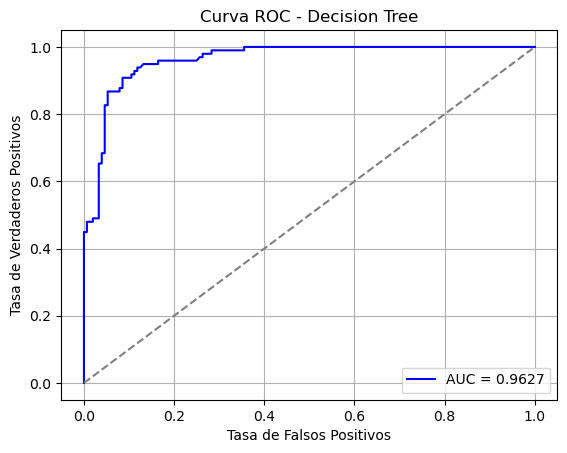

AUC: 0.9627


In [14]:
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Decision Tree')
plt.legend()
plt.grid()
plt.show()

print(f"AUC: {auc:.4f}")

- A nivel gráfico, la curva se encuentra más cerca a la esquina superior izquierda, indicando que _**el modelo es bueno para clasificar entre los clientes que compran un auto y los que no lo hacen**_.
- En el ámbito estadístico, el AUC tiene un valor de _**95.64%**_, _**apoyando y reforzando la conclusión sobre la buena capacidad de discriminación del modelo**_.

# Importancia de Características

Al igual que en los árboles individuales, los Random Forests permiten evaluar la importancia de cada variable. Se calcula promediando la importancia de cada árbol.

In [15]:
features = ['Age', 'AnnualSalary']
importancias_rf = classifier.feature_importances_

print("Importancia de características (Random Forest):")
for feature, importance in zip(features, importancias_rf):
    print(f"{feature}: {importance:.4f}")

Importancia de características (Random Forest):
Age: 0.5167
AnnualSalary: 0.4833


En base a las dos variables independientes del modelo, podemos deducir que, al momento de considerar múltiples árboles, la **_variable de edad (0.51) termina siendo la más importante por sobre el salario anual (0.48), aunque no con mucha diferencia_**, tal como sucedía en el modelo de Decision Tree pero a la inversa.

# Desviación Estándar entre Folds (Validación Cruzada)

En primer lugar, los **folds** son divisiones del dataset que se usan en el proceso de validación cruzada, lo cual indica que se va a entrenar el modelo un X número de veces, cada vez usando 1 fold para evaluar y los restantes para entrenar. Al final, se obtienen 5 resultados de rendimiento, como Accuracy, uno por cada fold usado como test.
- Esto sirve para evitar sesgos en el resultado del modelo, pues se lo entrena con diferentes combinaciones de entrenamiento y prueba, calculando el promedio para tener una estimación más realista del desempeño general del modelo. Lo anterior reduce el riesgo de que un solo "buen" o "malo" split distorsione tu evaluación. <br>
La validación cruzada permite medir la robustez del modelo y su estabilidad entre distintos subconjuntos. La desviación estándar refleja qué tanto varían los resultados.<br>
Ahora bien, la **Robustez del modelo** se refiere a su capacidad para mantener un buen rendimiento incluso cuando cambian los datos de entrada, por lo que un modelo robusto:
- No depende de un subconjunto específico para funcionar bien.
- Tiene un rendimiento consistente en diferentes partes del dataset. <br>
Por otro lado, la **Estabilidad entre distintos subconjuntos (Folds)** significa que, si se entrena al modelo con diferentes particiones del dataset (folds), las métricas obtenidas (como la precisión) no deberían variar mucho entre cada fold.<br><br>
Esta métrica se interpreta de la siguiente manera:
- Si la **desviación estándar es baja**, indica que el modelo se comporta de manera similar en todos los folds y, por lo tanto, es _estable y generaliza bien_.
- Si la **desviación estándar es alta**, significa que el rendimiento del modelo cambia mucho dependiendo del conjunto de entrenamiento/test, lo cual es señal de _poca estabilidad o sobreajuste_.

In [16]:
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print(f"Precision media: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")

Precision media: 0.9027
Desviación estándar: 0.0310


Bajo esta métrica, _**el modelo tiene un rendimiento alto y estable**_, pues la **precisión media** de todos los árboles es muy alta, teniendo un valor del _**90.27%**_ y, a su vez, una _**desviación estándar de 0.03**_ indica que **generaliza bien los datos (predice bien datos nuevos) y tiene muy poca variación en sus subconjuntos**.

# CONCLUSIONES

En conclusión, las variables de Edad y Salario Anual de un cliente eran determinantes para clasificar si este compraría o no un coche, por lo que se las estableció como variables independientes, y a esta decisión de compra como variable dependiente, debido a que estas dos primeras no tienen relación entre sí y la combinación de ellas influye en el cliente al momento de comprar un vehículo. Por otro lado, las métricas analizadas arrojaron los siguientes resultados:
- Al igual que en el Árbol de Decisiones, **el modelo tiene una buena clasificación general**, dado que en su Matriz de Confusión tiene _**21 errores de clasificación de los 250 datos que se utilizaron**_, un _poco menos que el modelo de DT_. Igualmente, su **Accuracy** fue aproximadamente un _**2% más alta que el DT (91.6%), lo que indica, en líneas generales, que Random Forest es ligeramente superior al modelo de Decision Trees**_.
- En cuanto a su **Precisión (91.4%), Sensibilidad (86.73%) y F1 Score (89.01%)**, se llega a la conclusión de que también _**existe un buen equilibrio entre las métricas de precisión y sensibilidad, una detección óptima de casos verdaderos positivos y un número ínfimo de falsos positivos**_.
- Respecto a su **Curva ROC y Área bajo la Curva (AUC)**, teniendo esta última un valor de _**96.27%**_, podemos decir que _**el modelo de Random Forest posee una excelente capacidad de clasificación entre los clientes compradores y no compradores, superando por muy poco al modelo individual de DT**_.
- En el ámbito de la Importancia de Características, _**cuando se aplica Random Forest resalta más la variable de la Edad (0.51), aunque con muy poca diferencia con la variable de Salario Anual (0.48)**_, concluyendo finalmente que **estas dos variables son sumamente importantes para que el modelo tenga una buena capacidad de discriminación**.
- Por último, al calcular la _**desviación media entre los Folds del modelo por medio de Validación Cruzada**_, se obtuvo que _**el modelo no tiene mucha variación en sus subconjuntos o folds (0.03), indicando estabilidad y un rendimiento alto también, pues la precisión media de todos los árboles del Random Forest tuvo un valor de 90.27%**_.